<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/TaskWeek4/Visualisasi_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data set ini merupakan dataset tentang prediksi penjualan rumah di king country dengan akurasi 75 - 80%, dataset ini memiliki history dari mei 2014 sampai mei 2015

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/Machine Learning/dataset/kc_house_data.csv'

In [4]:
# Baca dataset ke dalam DataFrame
df = pd.read_csv(file_path)

# Tampilkan lima baris pertama dari DataFrame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
unique_counts = df.nunique()

unique_counts

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [7]:
summary = df.describe()
summary

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


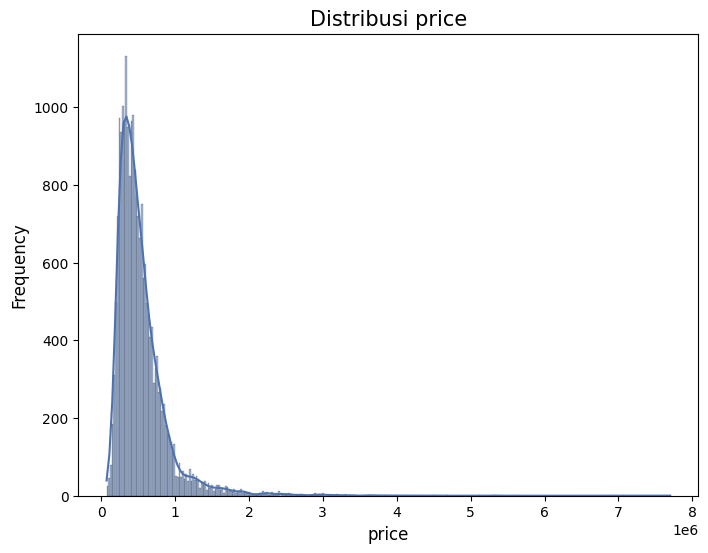

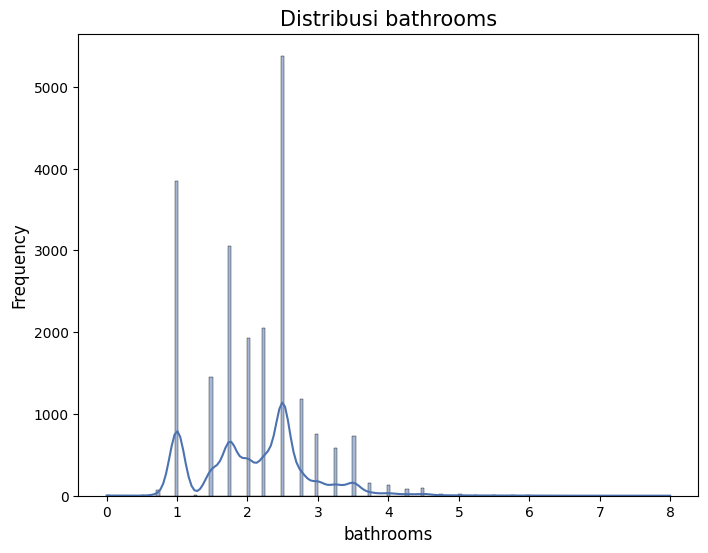

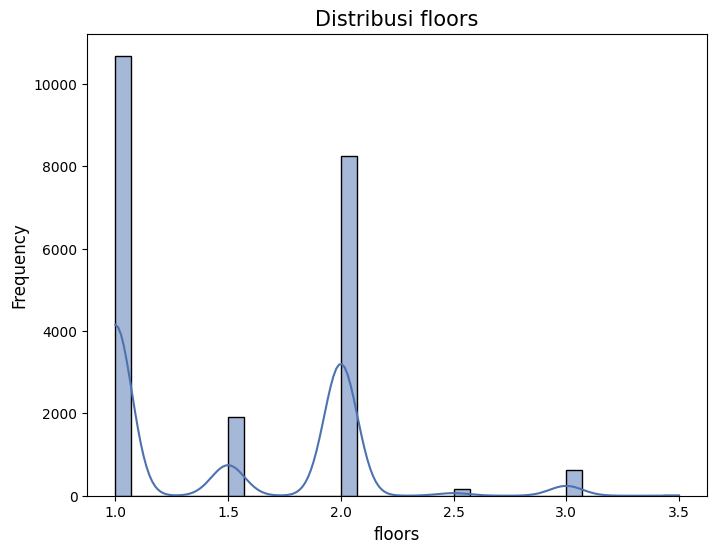

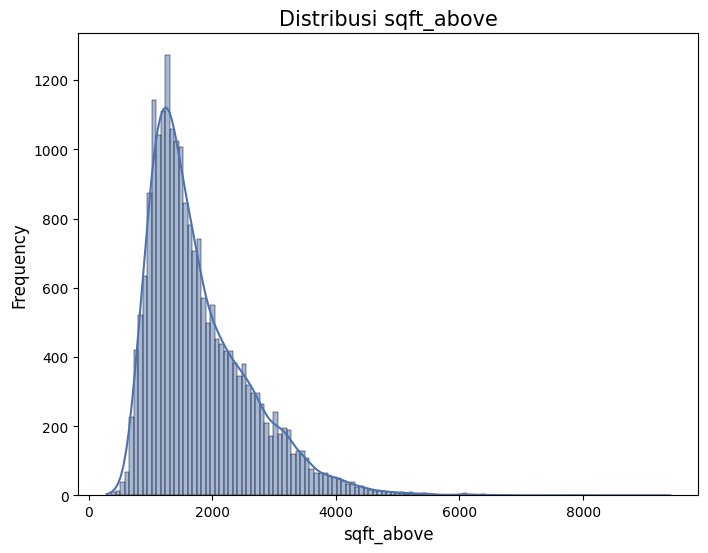

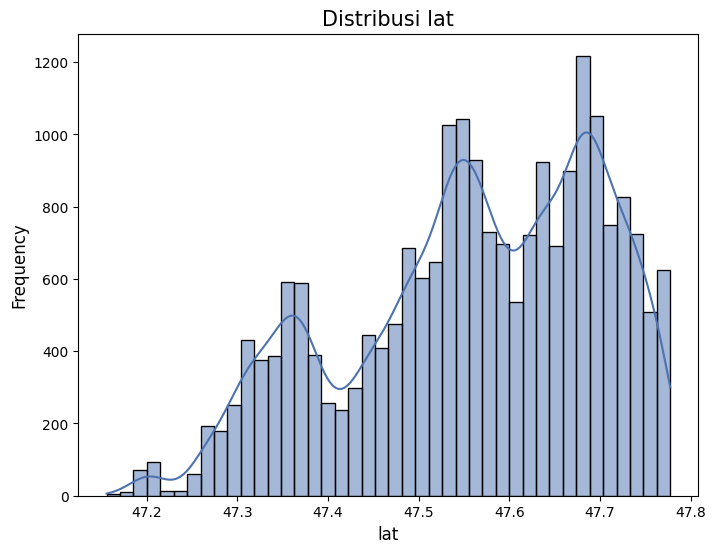

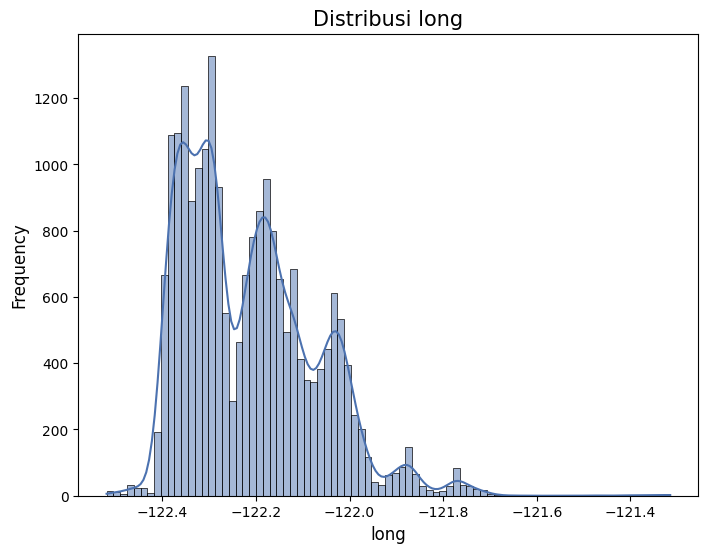

In [8]:
import seaborn as sns

# List fitur yang akan diplot
features_to_plot = [column for column in df.columns if df[column].dtype == 'float64']

# Mengatur palet warna Seaborn ke "deep" untuk warna yang lebih gelap
sns.set_palette("deep")

# Visualisasi distribusi untuk setiap fitur
for feature in features_to_plot:
    # Menggunakan Subplots untuk mengatur layout plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Menggunakan Seaborn untuk plot histogram dengan kernel density estimation (kde)
    sns.histplot(df[feature], kde=True, ax=ax)

    # Menambahkan judul plot
    ax.set_title(f'Distribusi {feature}', size=15)

    # Menambahkan label sumbu x dan y
    ax.set_xlabel(feature, size=12)
    ax.set_ylabel('Frequency', size=12)

    # Menampilkan plot
    plt.show()

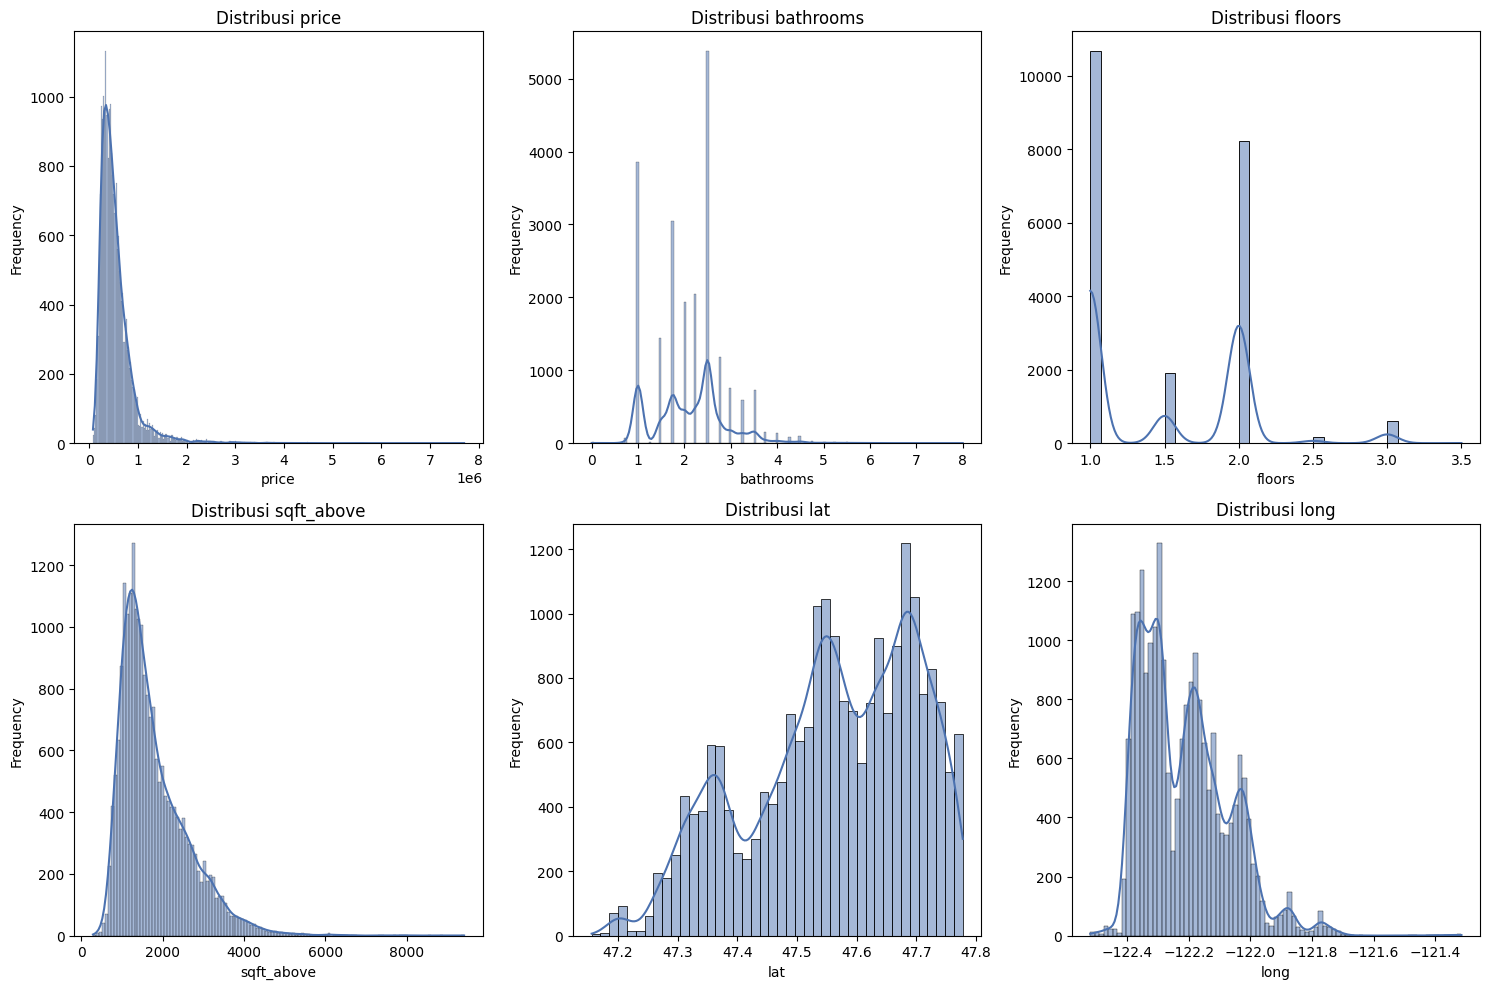

In [ ]:
# List fitur numerik yang akan diplot
numerical_features = [column for column in df.columns if df[column].dtype == 'float64']

# Mengatur palet warna Seaborn ke "deep" untuk warna yang lebih gelap
sns.set_palette("deep")

# Menghitung jumlah baris dan kolom untuk subplot
num_rows = 2
num_cols = 3

# Membuat subplot dengan ukuran yang sesuai
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Melakukan iterasi melalui fitur numerik dan menampilkan histogram pada setiap subplot
for i in range(num_rows):
    for j in range(num_cols):
        # Mengambil fitur numerik yang sesuai
        feature_index = i * num_cols + j
        if feature_index < len(numerical_features):
            feature = numerical_features[feature_index]

            # Menggunakan Seaborn untuk plot histogram dengan kernel density estimation (kde)
            sns.histplot(df[feature], kde=True, ax=axes[i, j])

            # Menambahkan judul plot
            axes[i, j].set_title(f'Distribusi {feature}', size=12)

            # Menambahkan label sumbu x dan y
            axes[i, j].set_xlabel(feature, size=10)
            axes[i, j].set_ylabel('Frequency', size=10)

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
from ipywidgets import interact, widgets

# List fitur numerik yang akan diplot
numerical_features = [column for column in df.columns if df[column].dtype == 'float64']

# Mengatur palet warna Seaborn ke "deep" untuk warna yang lebih gelap
sns.set_palette("deep")

def plot_distribution_with_interactive_bin_width(feature, bin_width):
    plt.figure(figsize=(8, 6))

    # Menggunakan Seaborn untuk plot histogram dengan kernel density estimation (kde)
    sns.histplot(df[feature], kde=True, bins=int((df[feature].max() - df[feature].min()) / bin_width))

    # Menambahkan judul plot
    plt.title(f'Distribusi {feature}', size=15)

    # Menambahkan label sumbu x dan y
    plt.xlabel(feature, size=12)
    plt.ylabel('Frequency', size=12)

    # Menampilkan plot
    plt.show()

# Membuat widget interaktif
interact(
    plot_distribution_with_interactive_bin_width,
    feature=widgets.Dropdown(options=numerical_features, value=numerical_features[0], description='Feature'),
    bin_width=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1, description='Bin Width')
)

interactive(children=(Dropdown(description='Feature', options=('price', 'bathrooms', 'floors', 'sqft_above', '…

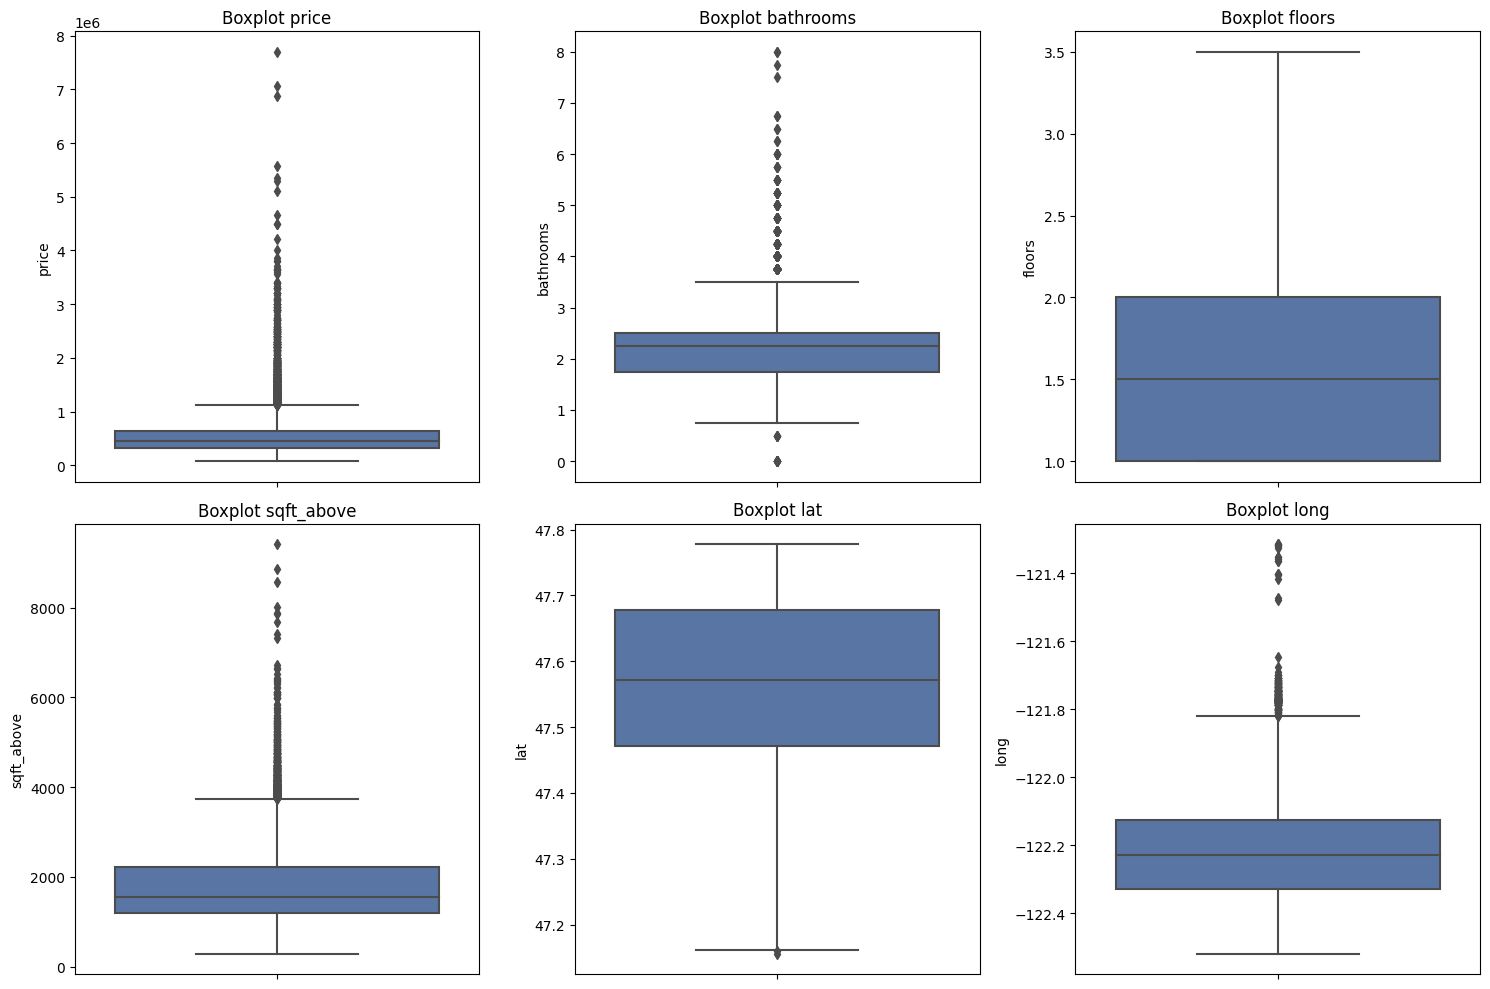

In [9]:
# List fitur numerik yang akan diplot
numerical_features = [column for column in df.columns if df[column].dtype == 'float64']

# Mengatur palet warna Seaborn ke "deep" untuk warna yang lebih gelap
sns.set_palette("deep")

# Menghitung jumlah baris dan kolom untuk subplot
num_rows = 2
num_cols = 3

# Membuat subplot dengan ukuran yang sesuai
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Melakukan iterasi melalui fitur numerik dan menampilkan boxplot pada setiap subplot
for i in range(num_rows):
    for j in range(num_cols):
        # Mengambil fitur numerik yang sesuai
        feature_index = i * num_cols + j
        if feature_index < len(numerical_features):
            feature = numerical_features[feature_index]

            # Menggunakan Seaborn untuk plot boxplot secara horizontal
            sns.boxplot(y=df[feature], ax=axes[i, j])

            # Menambahkan judul plot
            axes[i, j].set_title(f'Boxplot {feature}', size=12)

            # Menambahkan label sumbu y
            axes[i, j].set_ylabel(feature, size=10)

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan plot
plt.show()